Generate sentiment analysis 'content_sentiment' based on the 'content_plain' field of each piece of data, and save it to the original data. 

**Note:**  

Install NLTK first:  
```
pip install nltk
conda install anaconda::nltk
```

In [4]:
import json
import matplotlib.pyplot as plt
from utils.sentiAnalysis import SentimentAnalyzer

analyzer = SentimentAnalyzer()

! sentiAnalysis.py: VADER not found, running nltk.download('vader_lexicon') now ...


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/haotianshangguan/nltk_data...


In [5]:
with open("../data/emails_extracted.json", 'r') as file:
    data = json.load(file)
    
for record in data:
    content = record.get('content_plain', '')
    scores, category = analyzer.fit(content)
    record['content_sentiment'] = category

In [6]:
# Save 'content_sentiment' to our database
with open("../data/emails_extracted.json", 'w')as file:
    json.dump(data, file, indent=4, ensure_ascii=False)

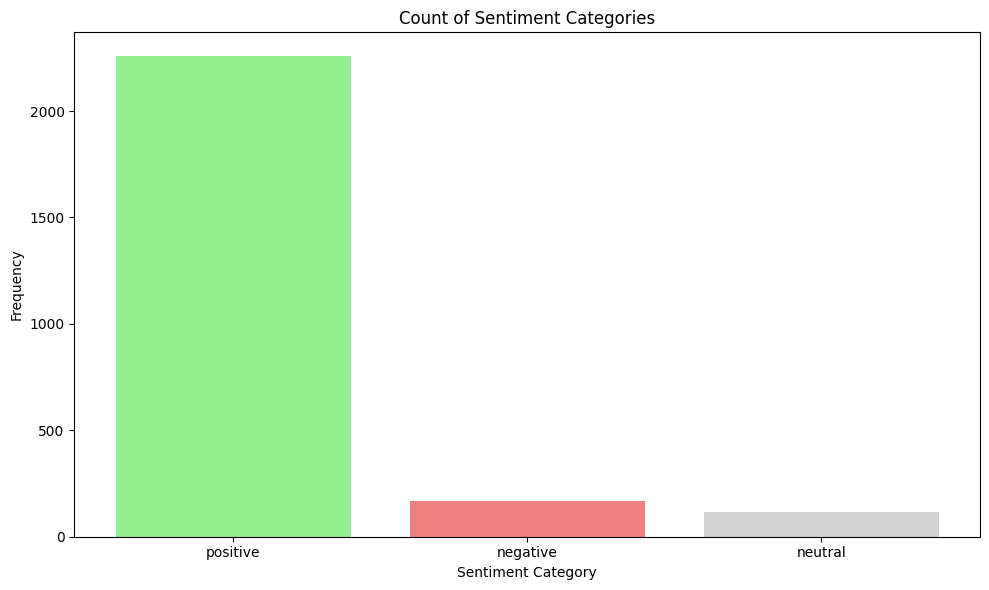

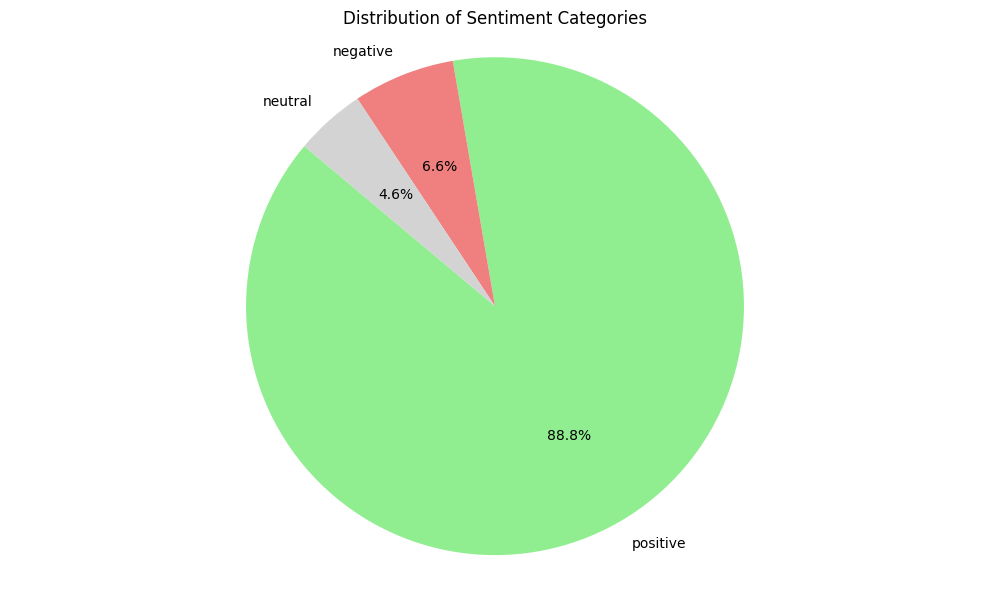

In [8]:
# Visualize the result
# TODO: Visualize the content sentiment distribution on different parties
sentiment_counts = {'positive': 0, 'negative': 0, 'neutral': 0}

for record in data:
    category = record.get('content_sentiment', '')
    sentiment_counts[category] += 1

categories = list(sentiment_counts.keys())
counts = list(sentiment_counts.values())
colors = ['lightgreen', 'lightcoral', 'lightgray'] 

# Assuming 'categories', 'counts', and 'colors' are defined
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(categories, counts, color=colors)
ax1.set_title('Count of Sentiment Categories')
ax1.set_xlabel('Sentiment Category')
ax1.set_ylabel('Frequency')
ax1.set_xticks(categories)  # Ensure categories are defined and appropriately formatted

plt.tight_layout()
plt.savefig('../result/sentiment_categories_bar_chart.png')  # Save the bar chart
plt.show()

fig, ax2 = plt.subplots(figsize=(10, 6))

ax2.pie(counts, labels=categories, colors=colors, autopct='%1.1f%%', startangle=140)
ax2.set_title('Distribution of Sentiment Categories')
ax2.axis('equal')  # This ensures the pie chart is a circle.

plt.tight_layout()
plt.savefig('../result/sentiment_categories_pie_chart.png')  # Save the pie chart with a different filename
plt.show()